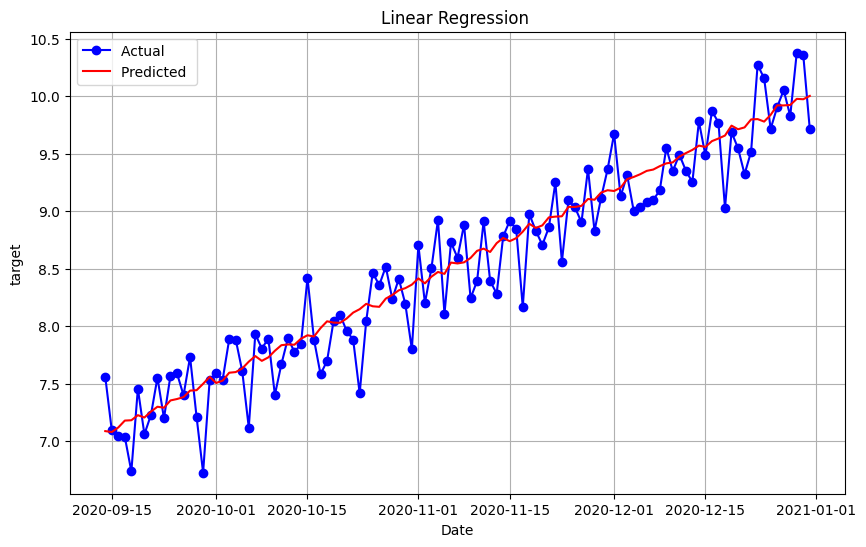

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


def create_trend_data(start_date, end_date, noise_level=1.0):
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    trend = np.linspace(0, 10, len(date_range))
    noise = noise_level * np.random.randn(len(date_range))
    target = trend + noise

    data = pd.DataFrame({'date': date_range, 'target': target})
    data.set_index('date', inplace=True)
    return data


def linear_regression_trend(data, target_column, test_size=0.2, lags=2):
    data['time'] = np.arange(len(data))

    for lag in range(1, lags + 1):
        data[f'lag_{lag}'] = data[target_column].shift(lag)

    data.dropna(inplace=True)

    split_index = int(len(data) * (1 - test_size))
    train_data = data[:split_index]
    test_data = data[split_index:]

    X_train = train_data[['time'] + [f'lag_{lag}' for lag in range(1, lags + 1)]]
    y_train = train_data[target_column]
    X_test = test_data[['time'] + [f'lag_{lag}' for lag in range(1, lags + 1)]]
    y_test = test_data[target_column]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    return model, predictions, test_data


def plot_trend_results(test_data, predictions, target_column):
    plt.figure(figsize=(10, 6))
    plt.plot(test_data.index, test_data[target_column], label='Actual ', color='blue', marker='o')
    plt.plot(test_data.index, predictions, label='Predicted ', color='red', linestyle='-', marker='')
    plt.xlabel('Date')
    plt.ylabel(target_column)
    plt.title('Linear Regression ')
    plt.legend()
    plt.grid(True)
    plt.show()


start_date = '2020-01-01'
end_date = '2020-12-31'
data = create_trend_data(start_date, end_date, noise_level=0.3)

model, predictions, test_data = linear_regression_trend(data, target_column='target', test_size=0.3, lags=4)

plot_trend_results(test_data, predictions, target_column='target')



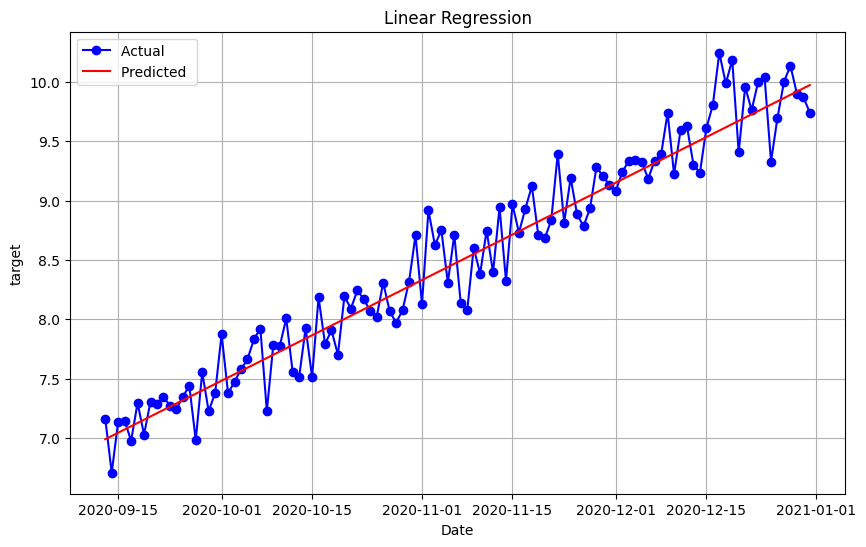

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


def create_trend_data(start_date, end_date, noise_level=1.0):
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    trend = np.linspace(0, 10, len(date_range))
    noise = noise_level * np.random.randn(len(date_range))
    target = trend + noise

    data = pd.DataFrame({'date': date_range, 'target': target})
    data.set_index('date', inplace=True)
    return data


def linear_regression_trend(data, target_column, test_size=0.2):
    data['time'] = np.arange(len(data))

    split_index = int(len(data) * (1 - test_size))
    train_data = data[:split_index]
    test_data = data[split_index:]

    X_train = train_data[['time']]
    y_train = train_data[target_column]
    X_test = test_data[['time']]
    y_test = test_data[target_column]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    return model, predictions, test_data


def plot_trend_results(test_data, predictions, target_column):
    plt.figure(figsize=(10, 6))
    plt.plot(test_data.index, test_data[target_column], label='Actual ', color='blue', marker='o')
    plt.plot(test_data.index, predictions, label='Predicted ', color='red', linestyle='-', marker='')
    plt.xlabel('Date')
    plt.ylabel(target_column)
    plt.title('Linear Regression')
    plt.legend()
    plt.grid(True)
    plt.show()


start_date = '2020-01-01'
end_date = '2020-12-31'
data = create_trend_data(start_date, end_date, noise_level=0.2)

model, predictions, test_data = linear_regression_trend(data, target_column='target', test_size=0.3)

plot_trend_results(test_data, predictions, target_column='target')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


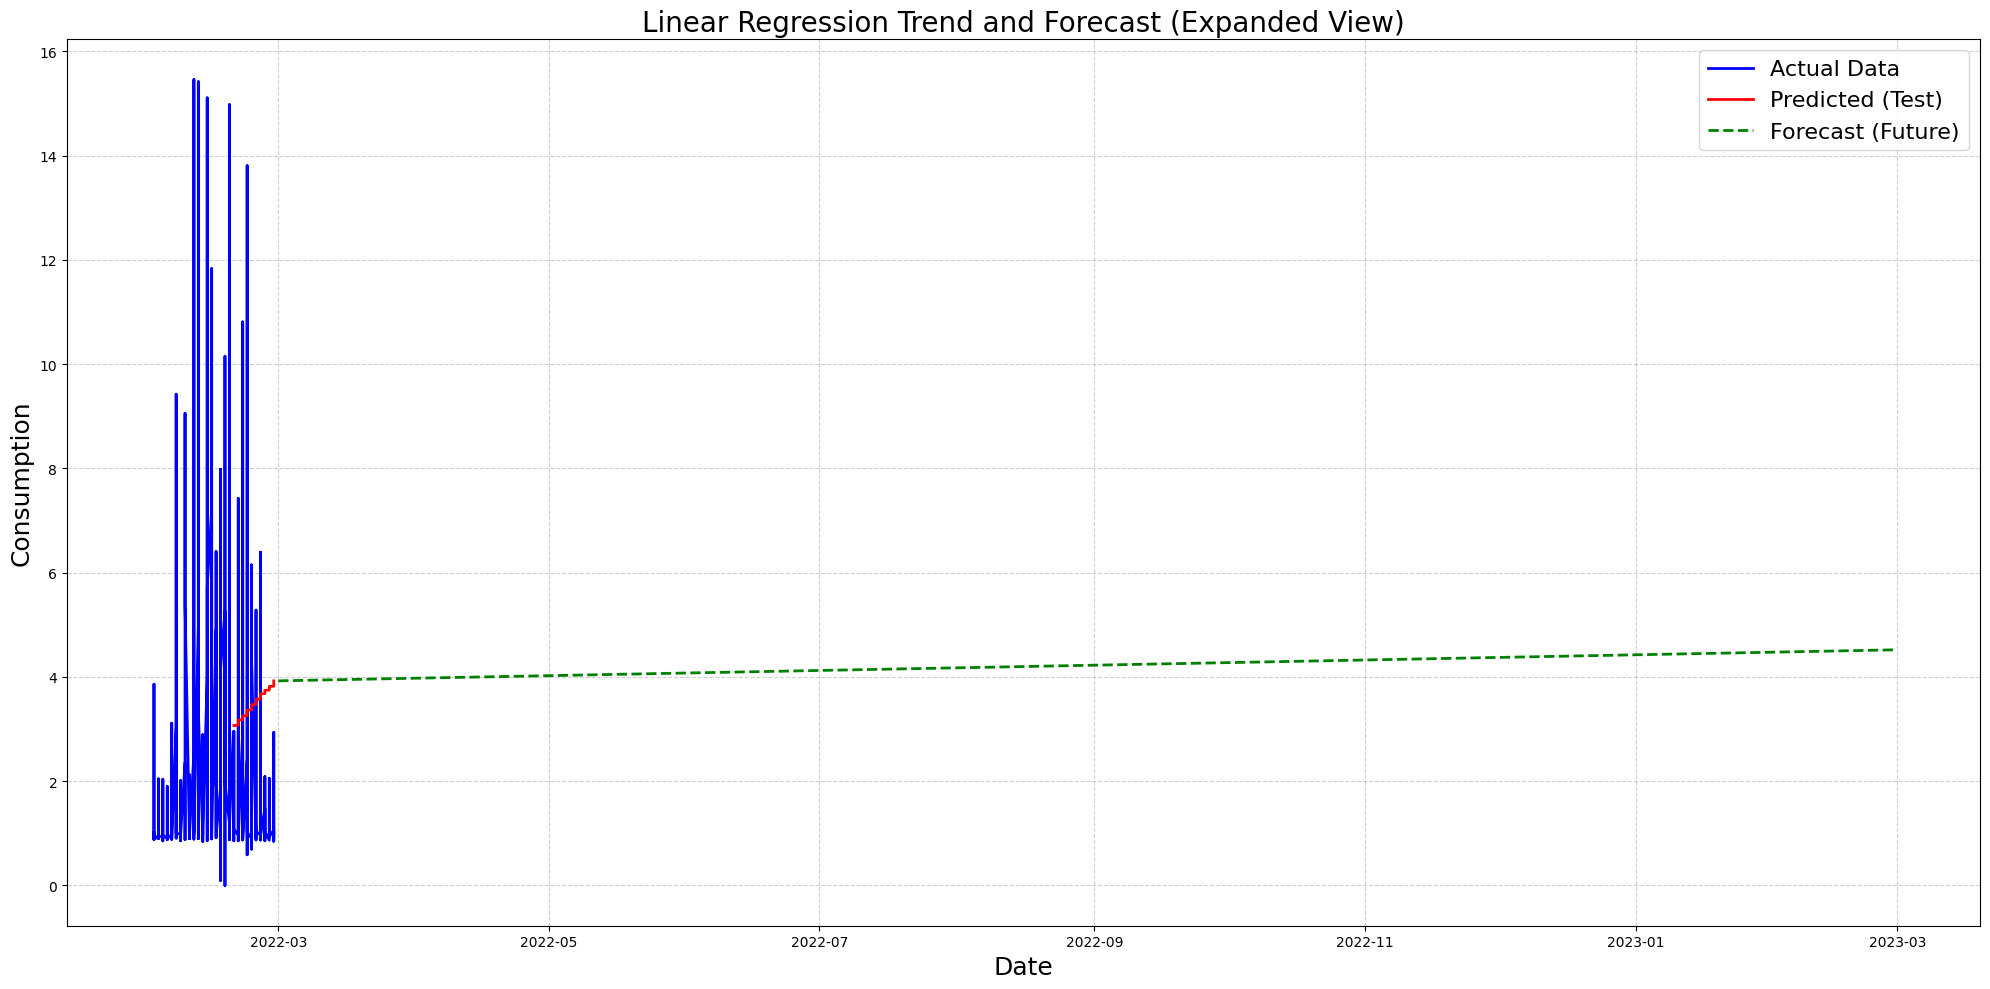

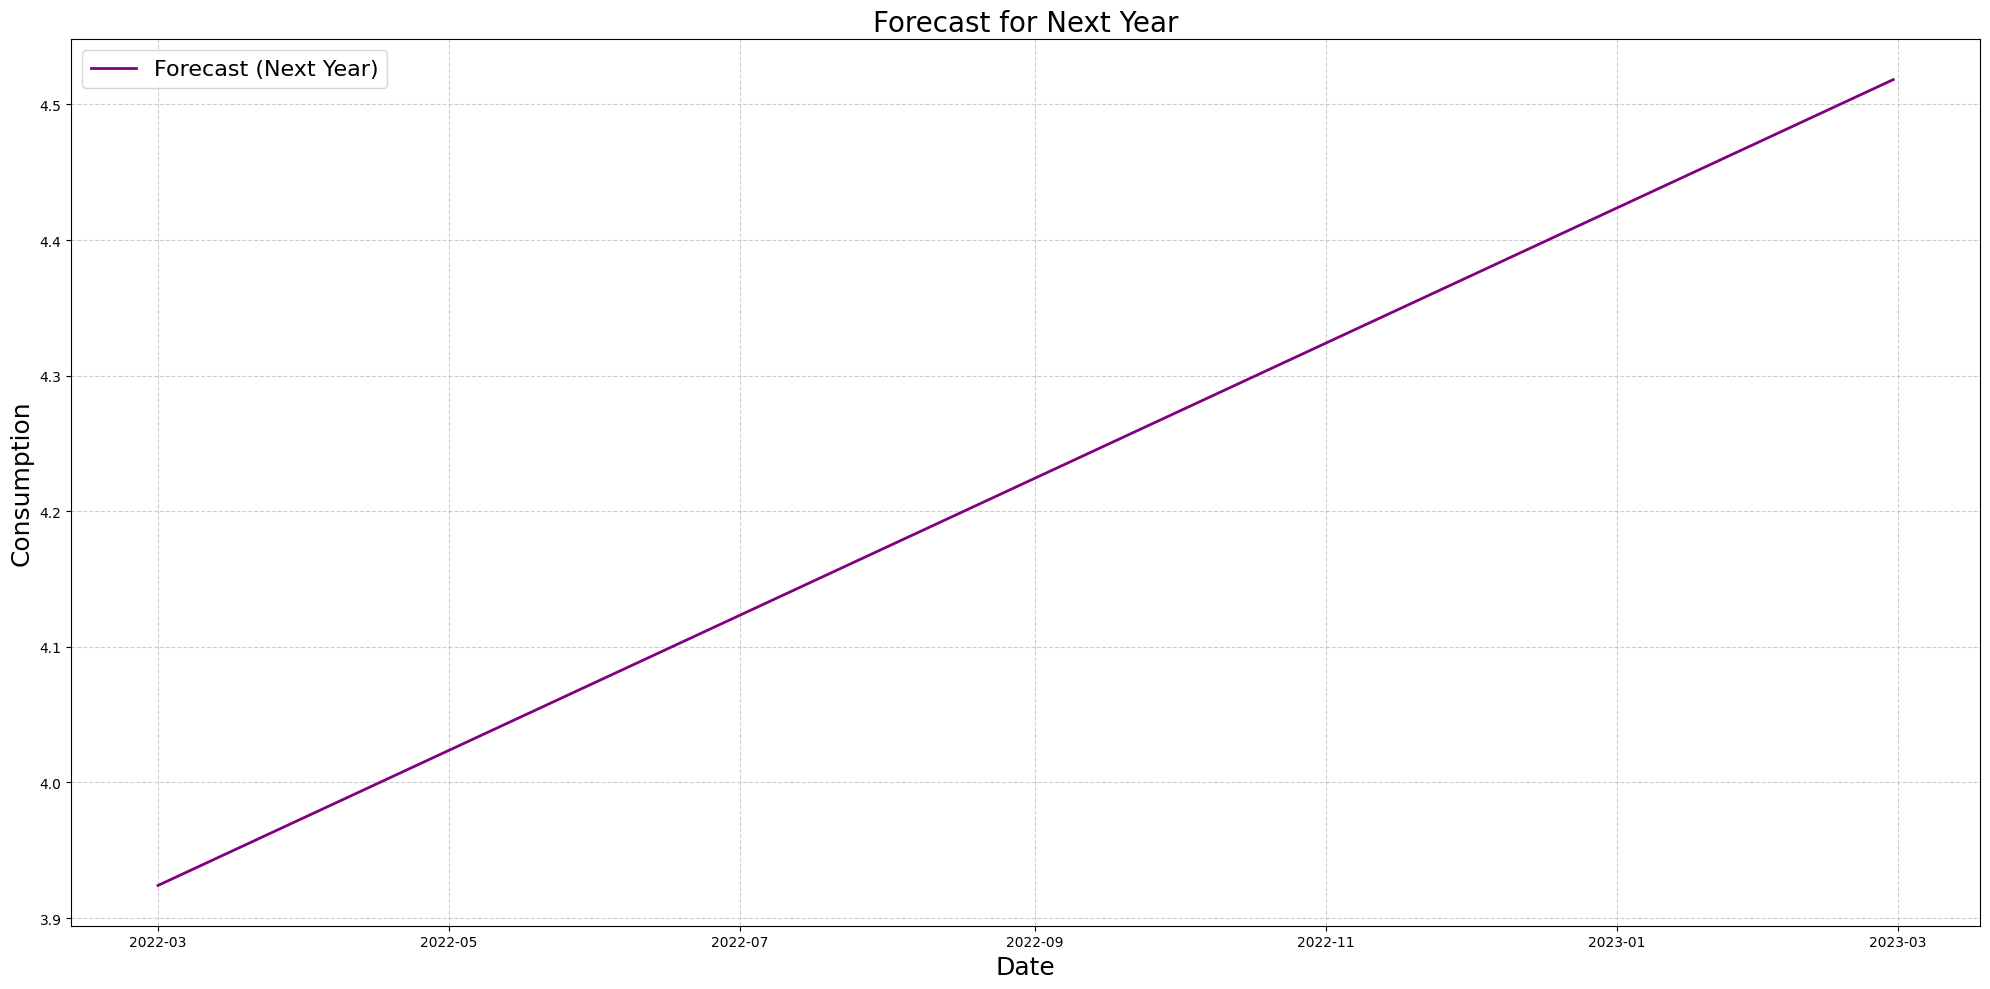

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def load_data(file_path, date_column, target_column):
    data = pd.read_csv(file_path, parse_dates=[date_column])
    data.set_index(date_column, inplace=True)
    data = data[[target_column]].dropna()
    return data

def linear_regression_trend(data, target_column, test_size=0.2):
    data['time'] = np.arange(len(data))

    split_index = int(len(data) * (1 - test_size))
    train_data = data[:split_index]
    test_data = data[split_index:]

    X_train = train_data[['time']]
    y_train = train_data[target_column]
    X_test = test_data[['time']]
    y_test = test_data[target_column]

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    return model, predictions, test_data

def forecast_future(model, data, future_days):
    future_index = np.arange(len(data), len(data) + future_days).reshape(-1, 1)
    future_predictions = model.predict(future_index)

    future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=future_days, freq='D')
    future_data = pd.DataFrame({"date": future_dates, "predicted": future_predictions})
    future_data.set_index("date", inplace=True)

    return future_data

def plot_trend_results(data, test_data, predictions, future_data, target_column):
    plt.figure(figsize=(20, 10))

    plt.plot(data.index, data[target_column], label='Actual Data', color='blue', linewidth=2)
    plt.plot(test_data.index, predictions, label='Predicted (Test)', color='red', linewidth=2)
    plt.plot(future_data.index, future_data['predicted'], label='Forecast (Future)', color='green', linestyle='--', linewidth=2)

    plt.xlabel('Date', fontsize=18)
    plt.ylabel(target_column, fontsize=18)
    plt.title('Linear Regression Trend and Forecast (Expanded View)', fontsize=20)
    plt.legend(fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def plot_future_only(future_data, target_column):
    plt.figure(figsize=(20, 10))

    plt.plot(future_data.index, future_data['predicted'], label='Forecast (Next Year)', color='purple', linewidth=2)

    plt.xlabel('Date', fontsize=18)
    plt.ylabel(target_column, fontsize=18)
    plt.title('Forecast for Next Year', fontsize=20)
    plt.legend(fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

file_path = '/content/test2.csv'
date_column = 'TxnDate'
target_column = 'Consumption'

data = load_data(file_path, date_column, target_column)

model, predictions, test_data = linear_regression_trend(data, target_column, test_size=0.3)

future_data = forecast_future(model, data, future_days=365)

plot_trend_results(data, test_data, predictions, future_data, target_column)

plot_future_only(future_data, target_column)
